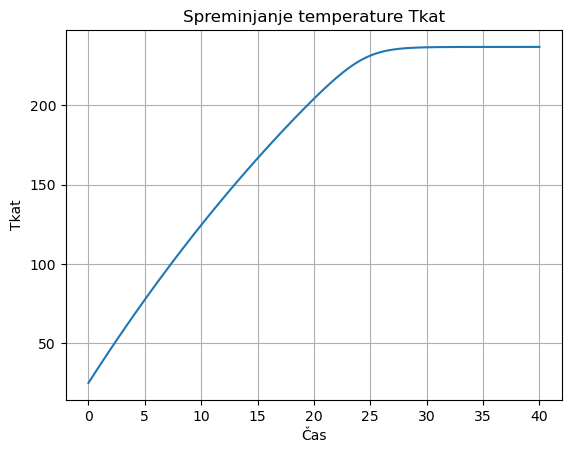

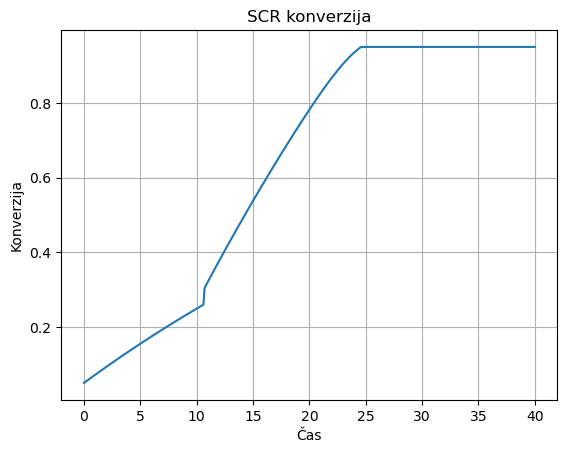

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Podatki
R = 8.314  # [J/Kmol]
L = 0.465  # length [m]
r1 = 98e-3  # inner radius of pipe [m]
r2 = 100e-3  # outer radius of pipe [m]
alpha1 = 3.8  # convective heat transfer coefficient [W/m^2K]
alpha2 = 10  # convective heat transfer coefficient [W/m^2K]
lambda1 = 15  # thermal conductivity [W/mK]
Tin = 400+ 273.15  # exhaust gas temperature [K]
Tout = 25 + 273.15  # outside catalyst temperature [K]
Cp = 65  # heat capacity of catalyst [J/molK]
V_cat = 0.0163  # volume of the SCR catalyst [m^3]
A_cat = V_cat * 20  # surface of the SCR catalyst [m^2]
Rho = 4230  # density of platinum [kg/m^3]
Rtot = 1 / (alpha1 * A_cat) + 1 / (alpha1 * 2 * np.pi * r1 * L) + np.log(r2 / r1) / (2 * np.pi * L * lambda1) + 1 / (
            alpha2 * 2 * np.pi * r2 * L) 
M_TiO2 = 0.079866 #[kg/mol]
Rho_mol = Rho/M_TiO2

# Konstante za generacijo toplote
H_N2 = 0  # [kJ/mol]
H_H2O = -241.818
H_NH3 = -45.94
H_NO = 90.25
H_NO2 = 33.18
H_O2 = 0
Ea_std = 72.7 * 1000  # [J/mol]
Ea_fast = 46.6 * 1000  # [J/mol]
Ea_ox = 221.1 * 1000  # [J/mol]
k_std_0 = 1.85e09
k_fast_0 = 3.14e12
k_ox_0 = 3.27e16

# Časovni koraki
dt = 0.1
total_time = 40.0
num_steps = int(total_time / dt)

# Začetna vrednost konverzije in seznam za shranjevanje
Conv_0 = 0.05
Conv_values = [Conv_0]

# Začetna temperatura
Tkat_0 = 25.0

# Seznam za shranjevanje vrednosti Tkat
Tkat_values = [Tkat_0]

# Tkat_new = 
# Numerično reševanje
for i in range(num_steps):
    Tkat = Tkat_values[-1]
    k_std = k_std_0 * np.exp(-Ea_std / (R * Tkat))
    k_fast = k_fast_0 * np.exp(-Ea_fast / (R * Tkat))
    k_ox = k_ox_0 * np.exp(-Ea_ox / (R * Tkat))
    
    ppm_NO2 = 5000  # [ppm=g/m3]
    ppm_NO = 500
    ppm_NH3 = 10000
    ppm_H2O = 1000
    M_NO2 = 46  # [g/mol]
    M_NO = 30
    M_NH3 = 17
    M_H2O = 18
        # Računanje koncentracij
    C_NO2 = ppm_NO2 / M_NO2  # [mol/m3]
    C_NO = ppm_NO / M_NO
    C_NH3 = ppm_NH3 / M_NH3
    C_H2O = ppm_H2O / M_H2O
    
    # Izračun reakcijskih časov
    if (ppm_NO > ppm_NO2):
        r_std = k_std * C_NO * C_NH3 * 0.8 # Reakcijski čas za Hr,std [mol/m3s]
        r_fast = k_fast * C_NO2 * C_NO * C_NH3 * 0.1 # Reakcijski čas za Hr,fast
        r_ox = k_ox * C_NH3 * 0.1  # Reakcijski čas za Hr,ox
    
    elif (ppm_NO == ppm_NO2):
        r_std = k_std * C_NO * C_NH3 * 0.4 
        r_fast = k_fast * C_NO2 * C_NO * C_NH3 * 0.4
        r_ox = k_ox * C_NH3 * 0.2
    
    else:
        r_std = k_std * C_NO * C_NH3 * 0.33 
        r_fast = k_fast * C_NO2 * C_NO * C_NH3 * 0.33
        r_ox = k_ox * C_NH3 * 0.33
     
    
    # Izračun vsote generacij toplote
    
   
    Hr_std = (H_N2 + 1.5 * H_H2O) - (H_NH3 + H_NO + 0.25 * H_O2)  # [kJ/mol]
    Hr_fast = (H_N2 + 1.5 * H_H2O) - (H_NH3 + 0.5 * H_NO + 0.5 * H_NO2)
    Hr_ox = (H_N2 + 1.5 * H_H2O) - (H_NH3 + 1.25 * H_O2)
    Hr_sum = (Hr_std * r_std + Hr_fast * r_fast + Hr_ox * r_ox) * 1000  # [J/m3s] 
    
    
    # Izračun spremembe temperature
    dTkat_dt = (alpha1 * (Tin - Tkat_values[-1]) * A_cat - (Tin - Tout) / Rtot + Hr_sum * V_cat/1e9) / (Rho_mol * Cp * V_cat/1e3)
    
    # Izračun nove temperature
    Tkat_new = Tkat_values[-1] + dTkat_dt * dt
    Tkat_values.append(Tkat_new)
    
    # SCR konverzijska efektivnost
    
    if (10 <= Tkat_new < 130 ):
        Conv_dt = 0.002*Tkat_new
        
    elif (130 <= Tkat_new < 230 ):
        Conv_dt = 0.0065*Tkat_new-0.545
        
    elif (230 <= Tkat_new < 430 ):
        Conv_dt = 0.95
    else:
        Conv_dt = -0.00275*Tkat_new+2.1325
        
    Conv_new = Conv_dt 
    Conv_values.append(Conv_new)
    
# Prikaz grafa temperature 
time_values = np.linspace(0, total_time, num_steps + 1)
plt.plot(time_values, Tkat_values)
plt.xlabel('Čas')
plt.ylabel('Tkat')
plt.title('Spreminjanje temperature Tkat')
plt.grid(True)
plt.show()

# Prikaz grafa SCR konverzije
time_values = np.linspace(0, total_time, num_steps + 1)
plt.plot(time_values, Conv_values)
plt.xlabel('Čas')
plt.ylabel('Konverzija')
plt.title('SCR konverzija')
plt.grid(True)
plt.show()
